# Machine learning overview

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/insop/ML_crash_course/blob/main/1_ml_overview.ipynb)

## Outline

- Objectives
- Target audiences
- Machine learning: what and why
- Examples of machine learning
- Types of machine learning systems
- A short example
- Tutorials: numpy, pandas

## Objectives
- discuss high level ML overview
- review representative ML systems
- able to identify potential areas that AI/ML could be helpful
- understand the development cycle of AI/ML applications
- understand the end-to-end view of AI/ML applications

## Target audiences
- want to understand the high level view
    - read the notebook
- want to know how internals of ML system works
    - run the code in the notebook
- want to know
    - look at the material provided as references

## Machine learning: what and why

### *What is machine learning?

### *Why use machine learning?

## *Examples of applications

app with pictures..

## Types of machine learning systems
- Supervised learning
- Unsupervised learning
- Reinforcement learning

### *Supervised learning

### *Unsupervised learning

### *Reinforcement learning

## Short ML example

We will see a simple ML example that predict 'y' value give 'x' value. The following [code](https://github.com/ageron/handson-ml2/blob/3cffb49fffb4d79db5e68de1fc5f91d5e74262e8/01_the_machine_learning_landscape.ipynb) is from book [1].

Import python modules, [sklearn](https://scikit-learn.org/stable) provide many of the widely used ML models.

In [10]:
import sklearn
import sys

import matplotlib.pyplot as plt # graph
import numpy as np # number handling
import pandas as pd # structured data handling
import sklearn.linear_model
import os

A helper function to prepare dataset using OECD's life satisfaction values and the IMF's GDP per capita.

In [6]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

In [ ]:
# To plot pretty figures directly within Jupyter
%matplotlib inline
import matplotlib as mpl
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [7]:
# prepare download path
datapath = os.path.join("datasets", "lifesat", "")

In [9]:
# Download the data
import urllib.request
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
os.makedirs(datapath, exist_ok=True)
for filename in ("oecd_bli_2015.csv", "gdp_per_capita.csv"):
    print("Downloading", filename)
    url = DOWNLOAD_ROOT + "datasets/lifesat/" + filename
    urllib.request.urlretrieve(url, datapath + filename)

In [12]:
# load data and prepare input dataset

oecd_bli = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=',')
gdp_per_capita = pd.read_csv(datapath + "gdp_per_capita.csv",thousands=',',delimiter='\t',
                             encoding='latin1', na_values="n/a")

# Prepare the data
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

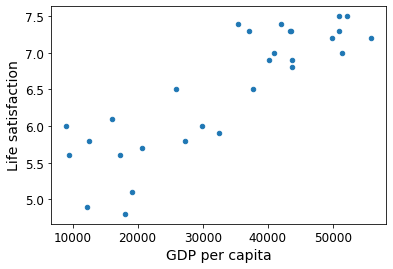

In [19]:
# Visualize the data
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.show()

The follosing two lines of code trains the ML model (linear regression)

In [20]:
# Select a linear model
model = sklearn.linear_model.LinearRegression()

# Train the model
model.fit(X, y)

LinearRegression()

Now we can make prediction 

In [34]:
# Make a prediction for Cyprus
X_new = [[22587]]  # Cyprus' GDP per capita
Y_predict = model.predict(X_new)

print("Life satisfaction of GDP ({}) : {}".format(X_new[0][0], Y_predict[0][0]))

Life satisfaction of GDP (22587) : 5.962423376619663


## Credits

This note book follws ...

## References

1. Book [Hands-on Machine Learning with Scikit-Learn, Keras and TensorFlow](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/)
2. Code example [01_the_machine_learning_landscape](https://github.com/ageron/handson-ml2/blob/3cffb49fffb4d79db5e68de1fc5f91d5e74262e8/01_the_machine_learning_landscape.ipynb)